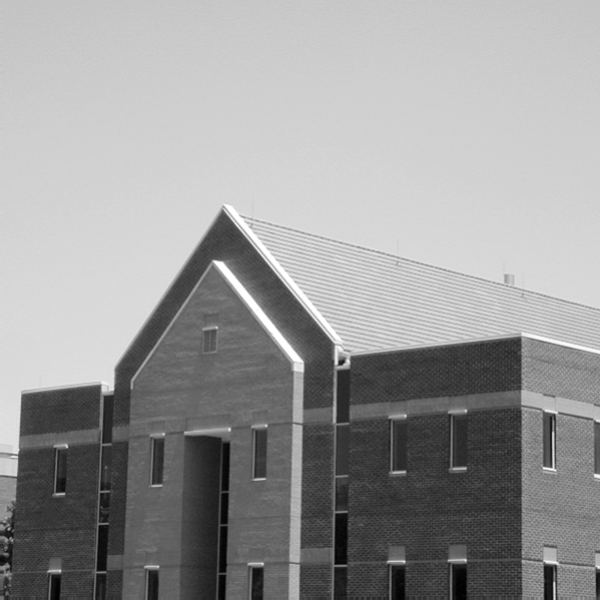

In [ ]:
# Set the stage
import cv2, math, time
import numpy as np
from google.colab.patches import cv2_imshow # remove this if not using Colab
import matplotlib.pyplot as plt
import scipy
from scipy import signal

# Read image
A = cv2.imread("building.tif",cv2.IMREAD_GRAYSCALE)
cv2_imshow(A)

# Get height and width of image
n = A.shape[0]
m = A.shape[1]


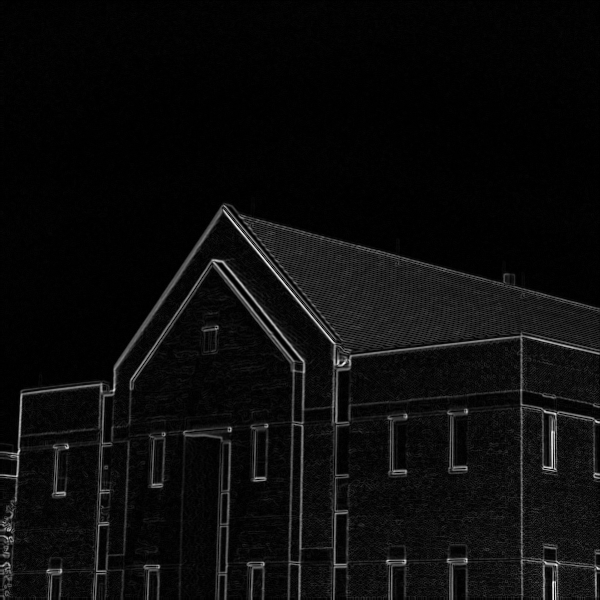

In [ ]:
# Compute gradient magnitude
G_x = cv2.Sobel(A,cv2.CV_64F,0,1)
G_y = cv2.Sobel(A,cv2.CV_64F,1,0)
G = np.abs(G_x) + np.abs(G_y)
# G = np.sqrt(np.power(G_x,2)+np.power(G_y,2))


B = G/np.max(G)*255
cv2_imshow(B)


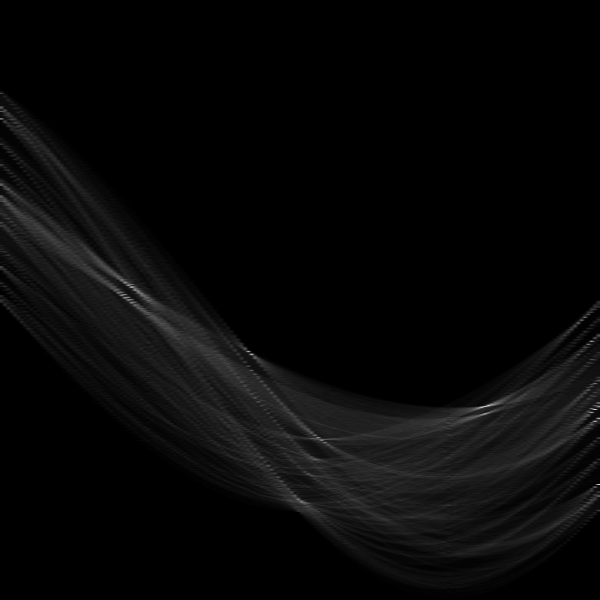

In [ ]:
x = []
y = []

for i in range(n):
    for j in range(m):
        if G[i,j] >= 200:
            x.append(i)
            y.append(j)


rho = 2*int(np.round(np.sqrt(np.power(m,2) + np.power(n,2))))
theta = np.pi / 180 *  (np.linspace(start = -89, stop=90, num=180))
H = np.zeros((rho,len(theta)))




for i in range(len(x)):
    for angle in range(len(theta)):

        p = int(np.round((x[i] * np.cos(theta[angle]) + y[i] * np.sin(theta[angle])))) + rho//2
        H[p,angle] += 1
H_reshape = cv2.resize(H,(m,n))
cv2_imshow(H_reshape)

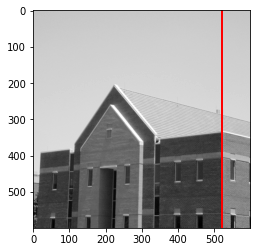

In [ ]:
maxi = 0
for i in range(rho):
    for j in range(len(theta)):
        if H[i,j] >= maxi:
            maxi = H[i,j]
            x = i - (rho//2)
            y = np.pi / 180 * (j-89)



def draw_line(A,rho,theta):
    # A - MxN original input image
    # rho - 1x1 $\rho$ of peak
    # theta - 1x1 $\theta$ of peak
    x = np.arange(0,A.shape[0])
    y = (rho - x * math.cos(theta)) / math.sin(theta)
    fig, ax = plt.subplots()
    ax.imshow(A, cmap='gray', vmin=0, vmax=255)
    ax.plot(y, x, '-', linewidth=2, color='red')
    plt.xlim(0,A.shape[1]-1)

draw_line(A,x,y)